In [1]:
from utils import SurrogatPyRepEnvironment, SimulationEnvironment
from basic_walk.utils import BaseAgent
import sys
import time


import pickle
import matplotlib.pyplot as plt
import numpy as np

# Base Agent

In [2]:
a = [np.ones(3), np.zeros(3)]
b = [np.ones(4), np.zeros(4)]
list(zip(a, b))

[(array([1., 1., 1.]), array([1., 1., 1., 1.])),
 (array([0., 0., 0.]), array([0., 0., 0., 0.]))]

In [16]:
%%time
info_log = []
forces = []

with SimulationEnvironment('scenes/new_basic_scene.ttt', headless_mode=False, foot_only_mode=True) as env:
    for i in range(1):
        agent = BaseAgent(random_mode=False, foot_only_mode=True)
        
        state = env.reset()
#         time.sleep(2)
        for _ in range(200):
#             before = time.time()
            action = agent.act(state)
#             after = time.time()
            
#             before = time.time()
            state, r, done, info = env.step(action)
#             after = time.time()
#             print(after - before)
            info_log.append(info)
#             forces.append(env._robot.get_joint_intervals())
            if done:
                print("Fuck")
                break

CPU times: user 5.85 s, sys: 657 ms, total: 6.5 s
Wall time: 10.9 s


In [4]:
assert False

AssertionError: 

In [5]:
def extract_param(info_log, param_name):
    param = []
    for info in info_log:
        param.append(info[param_name])
    
    return param

In [15]:
actions = extract_param(info_log, "action")
actions = np.array(actions) / np.pi * 180

joint_names = [
        'Leg_right_10',
        'Leg_right_9',
        'Leg_right_8',
        'Leg_right_7',
        'Leg_right_6',
        'Leg_right_5',
        'Tors1',
        'Leg_left_10',
        'Leg_left_9',
        'Leg_left_8',
        'Leg_left_7',
        'Leg_left_6',
        'Leg_left_5',
    ]
min_angles = actions.min(axis=0)

max_angles = actions.max(axis=0)

for name, min_angle, max_angle in zip(joint_names, min_angles, max_angles):
    print("{}: ({:.2f}, {:.2f})".format(name, float(min_angle), float(max_angle)))

Leg_right_10: (-0.00, 9.07)
Leg_right_9: (23.12, 87.91)
Leg_right_8: (-129.26, -45.60)
Leg_right_7: (18.73, 87.24)
Leg_right_6: (-2.82, 9.07)
Leg_right_5: (-1.65, 1.66)
Tors1: (0.00, 0.00)
Leg_left_10: (-5.82, 8.37)
Leg_left_9: (-89.70, -23.12)
Leg_left_8: (45.60, 129.46)
Leg_left_7: (-87.40, -18.66)
Leg_left_6: (-2.37, 8.37)
Leg_left_5: (-1.66, 1.65)


## Ходьба

In [ ]:
%%time
info_log = []
forces = []

with SurrogatPyRepEnvironment('scenes/basic_scene.ttt', headless_mode=True, foot_only_mode=True) as env:
    for i in range(1):
        agent = BaseAgent(random_mode=False, foot_only_mode=True)
        
        state = env.reset()
#         time.sleep(2)
        for _ in range(200):
#             before = time.time()
            action = agent.act(state)
#             after = time.time()
            
#             before = time.time()
            state, r, done, info = env.step(action)
#             after = time.time()
#             print(after - before)
            info_log.append(info)
#             forces.append(env._robot.get_joint_intervals())
            if done:
                print("Fuck")
                break

In [ ]:
for i in range(13):
    plt.plot(np.array(forces)[:, i])
    plt.show()


## Анализ

In [5]:
def plot_info_param(info_log, param_name):
    param = []
    for info in info_log:
        param.append(info[param_name])
    
    plt.plot(param, label=param_name)
    plt.legend()
    plt.show()

In [6]:
info_log[0].keys()

dict_keys(['fall_metric', 'y', 'x', 'zpos', 'floor_collision', 'fall_prob', 'fall_reward', 'current_velocity', 'velocity_cross_prod', 'velocity_reward', 'mean_joint_distance', 'smooth_reward', 'self_collision', 'reward', 'action', 'state'])

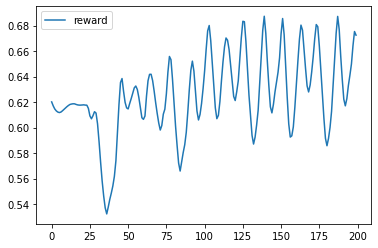

In [7]:
plot_info_param(info_log, 'reward')

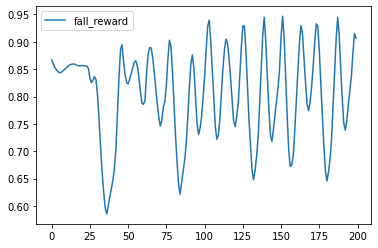

In [8]:
plot_info_param(info_log, 'fall_reward')

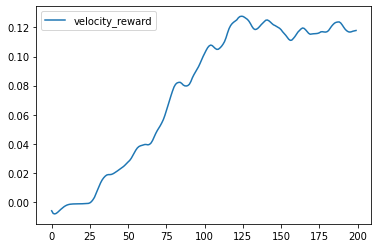

In [9]:
plot_info_param(info_log, 'velocity_reward')

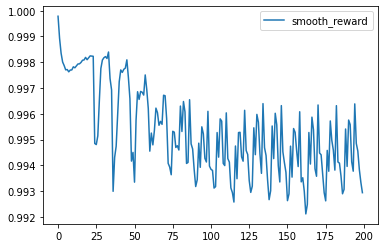

In [10]:
plot_info_param(info_log, 'smooth_reward')